In [ ]:
# %load Multiple Linear.py
# Multilinear Regression
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# loading the data
cars = pd.read_csv("E:\\Classes\\Trainer Tools\\Final\\03 Linear Regression\\Data Sets\\cars.csv")

# to get top 6 rows
cars.head(40) # to get top n rows use cars.head(10)

# Correlation matrix 
cars.corr()

# we see there exists High collinearity between input variables especially between
# [Hp & SP] , [VOL,WT] so there exists collinearity problem
 
# Scatter plot between the variables along with histograms
import seaborn as sns
sns.pairplot(cars)


# columns names
cars.columns

# pd.tools.plotting.scatter_matrix(cars); -> also used for plotting all in one graph
                             
# preparing model considering all the variables 
import statsmodels.formula.api as smf # for regression model
         
# Preparing model                  
ml1 = smf.ols('MPG~WT+VOL+SP+HP',data=cars).fit() # regression model

# Getting coefficients of variables               
ml1.params

# Summary
ml1.summary()
# p-values for WT,VOL are more than 0.05 and also we know that [WT,VOL] has high correlation value 

# preparing model based only on Volume
ml_v=smf.ols('MPG~VOL',data = cars).fit()  
ml_v.summary()
# p-value <0.05 .. It is significant 

# Preparing model based only on WT
ml_w=smf.ols('MPG~WT',data = cars).fit()  
ml_w.summary()

# Preparing model based only on WT & VOL
ml_wv=smf.ols('MPG~WT+VOL',data = cars).fit()  
ml_wv.summary()
# Both coefficients p-value became insignificant... 
# So there may be a chance of considering only one among VOL & WT

# Checking whether data has any influential values 
# influence index plots

import statsmodels.api as sm
sm.graphics.influence_plot(ml1)
# index 76 AND 78 is showing high influence so we can exclude that entire row

# Studentized Residuals = Residual/standard deviation of residuals

cars_new=cars.drop(cars.index[[76,78]],axis=0)
# X => A B C D 
# X.drop(["A","B"],axis=1) # Dropping columns 
# X.drop(X.index[[5,9,19]],axis=0)

#X.drop(["X1","X2"],aixs=1)
#X.drop(X.index[[0,2,3]],axis=0)


# Preparing model                  
ml_new = smf.ols('MPG~WT+VOL+HP+SP',data = cars_new).fit()    

# Getting coefficients of variables        
ml_new.params

# Summary
ml_new.summary()

# Confidence values 99%
print(ml_new.conf_int(0.01)) # 99% confidence level


# Predicted values of MPG 
mpg_pred = ml_new.predict(cars_new[['WT','VOL','HP','SP']])
mpg_pred

cars_new.head()
# calculating VIF's values of independent variables
rsq_hp = smf.ols('HP~WT+VOL+SP',data=cars_new).fit().rsquared  
vif_hp = 1/(1-rsq_hp) # 16.33

rsq_wt = smf.ols('WT~HP+VOL+SP',data=cars_new).fit().rsquared  
vif_wt = 1/(1-rsq_wt) # 564.98

rsq_vol = smf.ols('VOL~WT+SP+HP',data=cars_new).fit().rsquared  
vif_vol = 1/(1-rsq_vol) #  564.84

rsq_sp = smf.ols('SP~WT+VOL+HP',data=cars_new).fit().rsquared  
vif_sp = 1/(1-rsq_sp) #  16.35

           # Storing vif values in a data frame
d1 = {'Variables':['Hp','WT','VOL','SP'],'VIF':[vif_hp,vif_wt,vif_vol,vif_sp]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame
# As weight is having higher VIF value, we are not going to include this prediction model

# Added varible plot 
sm.graphics.plot_partregress_grid(ml_new)

# added varible plot for weight is not showing any significance 

# final model
final_ml= smf.ols('MPG~VOL+SP+HP',data = cars_new).fit()
final_ml.params
final_ml.summary()
# As we can see that r-squared value has increased from 0.810 to 0.812.

mpg_pred = final_ml.predict(cars_new)

import statsmodels.api as sm
# added variable plot for the final model
sm.graphics.plot_partregress_grid(final_ml)


######  Linearity #########
# Observed values VS Fitted values
plt.scatter(cars_new.MPG,mpg_pred,c="r");plt.xlabel("observed_values");plt.ylabel("fitted_values")

# Residuals VS Fitted Values 
plt.scatter(mpg_pred,final_ml.resid_pearson,c="r"),plt.axhline(y=0,color='blue');plt.xlabel("fitted_values");plt.ylabel("residuals")


########    Normality plot for residuals ######
# histogram
plt.hist(final_ml.resid_pearson) # Checking the standardized residuals are normally distributed

# QQ plot for residuals 
import pylab          
import scipy.stats as st

# Checking Residuals are normally distributed
st.probplot(final_ml.resid_pearson, dist="norm", plot=pylab)


############ Homoscedasticity #######

# Residuals VS Fitted Values 
plt.scatter(mpg_pred,final_ml.resid_pearson,c="r"),plt.axhline(y=0,color='blue');plt.xlabel("fitted_values");plt.ylabel("residuals")



### Splitting the data into train and test data 

from sklearn.model_selection import train_test_split
cars_train,cars_test  = train_test_split(cars_new,test_size = 0.2) # 20% size

# preparing the model on train data 

model_train = smf.ols("MPG~HP+SP+VOL",data=cars_train).fit()

# train_data prediction
train_pred = model_train.predict(cars_train)

# train residual values 
train_resid  = train_pred - cars_train.MPG

# RMSE value for train data 
train_rmse = np.sqrt(np.mean(train_resid*train_resid))

# prediction on test data set 
test_pred = model_train.predict(cars_test)

# test residual values 
test_resid  = test_pred - cars_test.MPG

# RMSE value for test data 
test_rmse = np.sqrt(np.mean(test_resid*test_resid))


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [5]:
cars = pd.read_csv("cars.csv")
cars

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
5,70,45.696322,89,113.185353,29.591768
6,55,50.013401,92,105.461264,30.308480
7,62,46.716554,50,102.598513,15.847758
8,62,46.716554,50,102.598513,16.359484
9,80,42.299078,94,115.645204,30.920154


In [7]:
cars.head(5)

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [8]:
cars.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


In [9]:
import seaborn as sns

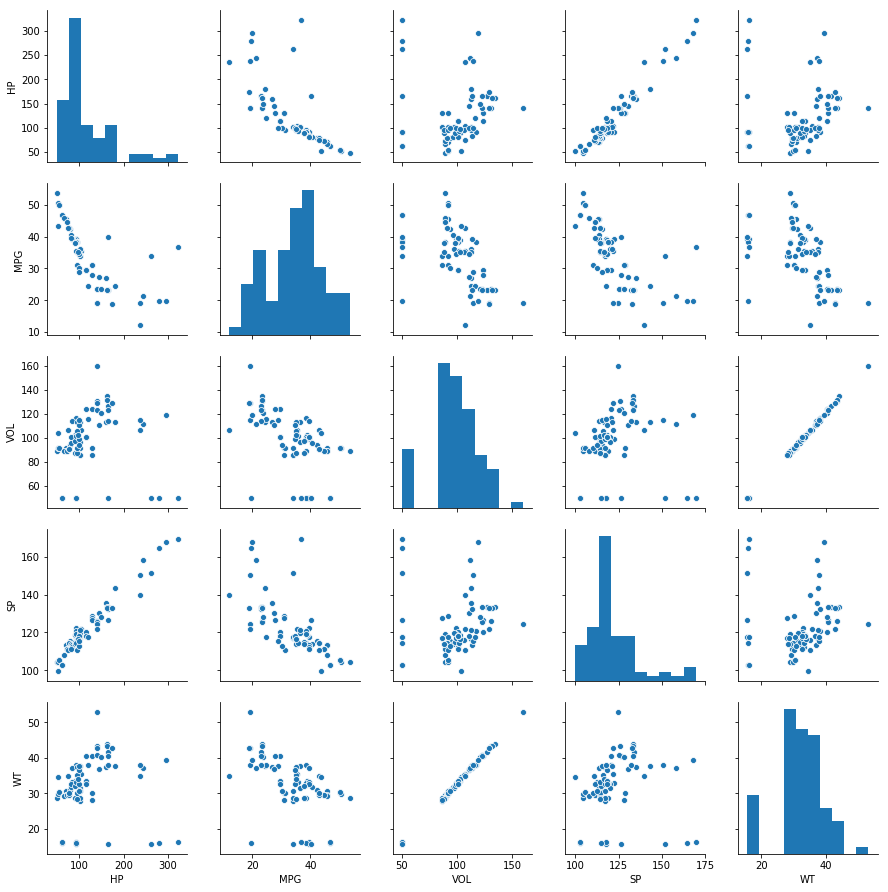

In [10]:
sns.pairplot(cars)

In [11]:
cars.columns

Index(['HP', 'MPG', 'VOL', 'SP', 'WT'], dtype='object')

In [12]:
import statsmodels.formula.api as smf # for regression model

In [13]:
ml1 = smf.ols('MPG~WT+VOL+SP+HP',data=cars).fit()

In [14]:
ml1.params

Intercept    30.677336
WT            0.400574
VOL          -0.336051
SP            0.395627
HP           -0.205444
dtype: float64

In [15]:
ml1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Sun, 21 Jun 2020   Prob (F-statistic):           1.54e-23
Time:                        11:39:56   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6773     14.900      2.059      0.043       1.001      60.354
WT             0.4006      1.693      0.237      0.814      -2.972       3.773
VOL           -0.3361      0.569     -0.591      0.556      -1.469       0.796
SP             0.3956      0.158      2.500      0.015       0.080       0.711
HP            -0.2054      0.039     -5.239      0.000      -0.284      -0.127
==============================================================================
Omnibus:                       10.780   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.722
Skew:                           0.707   Prob(JB):                      0.00285
Kurtosis:                       4.215   Cond. No.                     6.09e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
ml_v=smf.ols('MPG~VOL',data = cars).fit() 

In [17]:
ml_v.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     30.71
Date:                Sun, 21 Jun 2020   Prob (F-statistic):           3.82e-07
Time:                        11:42:14   Log-Likelihood:                -280.28
No. Observations:                  81   AIC:                             564.6
Df Residuals:                      79   BIC:                             569.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     55.8171      3.957     14.106      0.000      47.941      63.693
VOL           -0.2166      0.039     -5.541      0.000      -0.294      -0.139
==============================================================================
Omnibus:                        2.691   Durbin-Watson:                   0.566
Prob(Omnibus):                  0.260   Jarque-Bera (JB):                1.997
Skew:                          -0.263   Prob(JB):                        0.368
Kurtosis:                       3.562   Cond. No.                         462.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
ml_w=smf.ols('MPG~WT',data = cars).fit() 

In [19]:
ml_w.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     30.34
Date:                Sun, 21 Jun 2020   Prob (F-statistic):           4.38e-07
Time:                        11:42:57   Log-Likelihood:                -280.42
No. Observations:                  81   AIC:                             564.8
Df Residuals:                      79   BIC:                             569.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     55.2296      3.876     14.249      0.000      47.514      62.945
WT            -0.6420      0.117     -5.508      0.000      -0.874      -0.410
==============================================================================
Omnibus:                        2.735   Durbin-Watson:                   0.555
Prob(Omnibus):                  0.255   Jarque-Bera (JB):                2.045
Skew:                          -0.263   Prob(JB):                        0.360
Kurtosis:                       3.573   Cond. No.                         149.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
ml_wv=smf.ols('MPG~WT+VOL',data = cars).fit()  

In [21]:
ml_wv.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     15.33
Date:                Sun, 21 Jun 2020   Prob (F-statistic):           2.43e-06
Time:                        11:45:08   Log-Likelihood:                -280.16
No. Observations:                  81   AIC:                             566.3
Df Residuals:                      78   BIC:                             573.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     56.8847      4.534     12.546      0.000      47.858      65.912
WT             1.4349      2.929      0.490      0.626      -4.397       7.266
VOL           -0.6983      0.984     -0.710      0.480      -2.658       1.261
==============================================================================
Omnibus:                        2.405   Durbin-Watson:                   0.591
Prob(Omnibus):                  0.300   Jarque-Bera (JB):                1.712
Skew:                          -0.251   Prob(JB):                        0.425
Kurtosis:                       3.506   Cond. No.                         597.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

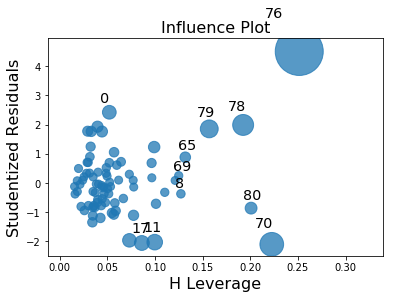

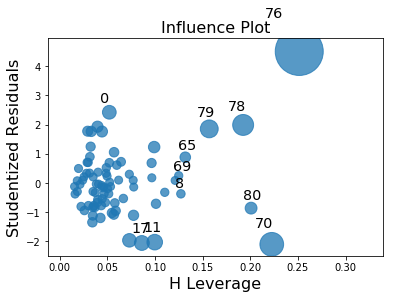

In [22]:
import statsmodels.api as sm
sm.graphics.influence_plot(ml1)

In [24]:
cars_new=cars.drop(cars.index[[76,78]],axis=0)
cars_new

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
5,70,45.696322,89,113.185353,29.591768
6,55,50.013401,92,105.461264,30.308480
7,62,46.716554,50,102.598513,15.847758
8,62,46.716554,50,102.598513,16.359484
9,80,42.299078,94,115.645204,30.920154


In [25]:
ml_new = smf.ols('MPG~WT+VOL+HP+SP',data = cars_new).fit()

In [26]:
ml_new.params

Intercept    19.396441
WT            0.419045
VOL          -0.287606
HP           -0.258860
SP            0.491610
dtype: float64

In [27]:
ml_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     103.2
Date:                Sun, 21 Jun 2020   Prob (F-statistic):           1.76e-29
Time:                        11:51:58   Log-Likelihood:                -212.89
No. Observations:                  79   AIC:                             435.8
Df Residuals:                      74   BIC:                             447.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.3964     12.506      1.551      0.125      -5.521      44.314
WT             0.4190      1.402      0.299      0.766      -2.375       3.213
VOL           -0.2876      0.471     -0.611      0.543      -1.226       0.650
HP            -0.2589      0.034     -7.671      0.000      -0.326      -0.192
SP             0.4916      0.132      3.717      0.000       0.228       0.755
==============================================================================
Omnibus:                       14.158   Durbin-Watson:                   1.189
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.671
Skew:                           0.945   Prob(JB):                     0.000395
Kurtosis:                       4.091   Cond. No.                     6.02e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
mpg_pred = ml_new.predict(cars_new[['WT','VOL','HP','SP']])
mpg_pred

0     44.386472
1     43.312122
2     43.197624
3     43.431364
4     43.096156
5     43.722591
6     43.245765
7     46.046164
8     46.260600
9     41.461903
10    41.867072
11    45.615035
12    40.886716
13    41.873397
14    42.197530
15    41.968139
16    41.635078
17    45.799661
18    41.800018
19    38.763174
20    39.206998
21    38.585471
22    38.584402
23    40.119289
24    39.861314
25    44.261578
26    37.248480
27    39.420887
28    39.421761
29    36.754917
        ...    
49    32.751953
50    32.649489
51    32.742835
52    30.084960
53    26.560150
54    27.650969
55    29.231721
56    35.023127
57    32.448584
58    34.682126
59    33.036743
60    29.407131
61    28.683153
62    25.628895
63    26.449960
64    25.584909
65    31.125721
66    24.943493
67    23.298441
68    23.806254
69    17.150103
70    20.084205
71    22.666387
72    23.116990
73    20.658730
74    23.823618
75    20.238082
77    14.629498
79     7.890851
80    10.923816
Length: 79, dtype: float

In [34]:
rsq_hp = smf.ols('HP~WT+VOL+SP',data=cars_new).fit().rsquared  
vif_hp = 1/(1-rsq_hp) # 16.33
vif_hp


16.332421749773403

In [36]:
rsq_wt = smf.ols('WT~HP+VOL+SP',data=cars_new).fit().rsquared  
vif_wt = 1/(1-rsq_wt) # 564.98
vif_wt

564.9862078239127

In [38]:
rsq_vol = smf.ols('VOL~WT+SP+HP',data=cars_new).fit().rsquared  
vif_vol = 1/(1-rsq_vol)
vif_vol

564.8458302030133

In [40]:
rsq_sp = smf.ols('SP~WT+VOL+HP',data=cars_new).fit().rsquared  
vif_sp = 1/(1-rsq_sp) #  16.35
vif_sp

16.351218924114963

In [41]:
d1 = {'Variables':['Hp','WT','VOL','SP'],'VIF':[vif_hp,vif_wt,vif_vol,vif_sp]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Hp,16.332422
1,WT,564.986208
2,VOL,564.845830
3,SP,16.351219


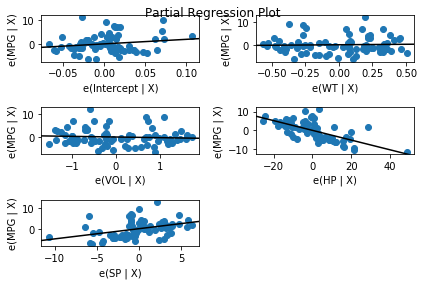

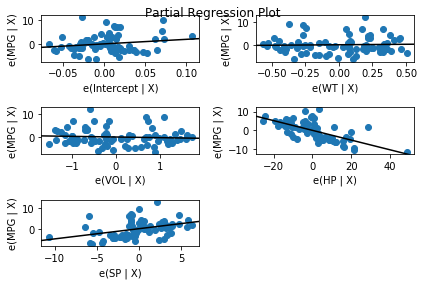

In [42]:
# Added varible plot 
sm.graphics.plot_partregress_grid(ml_new)

In [43]:
final_ml= smf.ols('MPG~VOL+SP+HP',data = cars_new).fit()
final_ml.params
final_ml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     139.2
Date:                Sun, 21 Jun 2020   Prob (F-statistic):           1.43e-30
Time:                        12:10:51   Log-Likelihood:                -212.93
No. Observations:                  79   AIC:                             433.9
Df Residuals:                      75   BIC:                             443.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.6539     12.182      1.531      0.130      -5.613      42.921
VOL           -0.1471      0.021     -7.105      0.000      -0.188      -0.106
SP             0.4964      0.130      3.804      0.000       0.236       0.756
HP            -0.2600      0.033     -7.808      0.000      -0.326      -0.194
==============================================================================
Omnibus:                       14.094   Durbin-Watson:                   1.172
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.575
Skew:                           0.942   Prob(JB):                     0.000415
Kurtosis:                       4.086   Cond. No.                     5.82e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.82e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

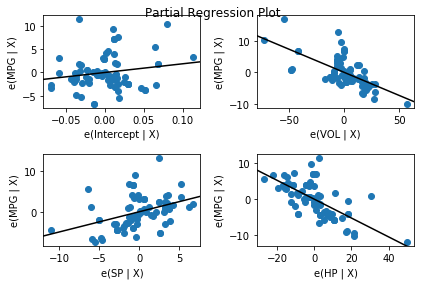

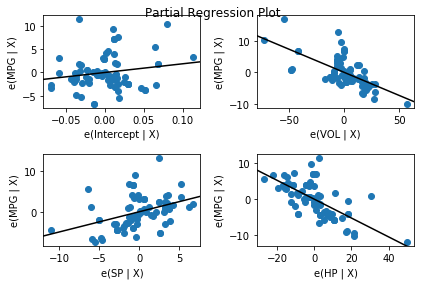

In [44]:
sm.graphics.plot_partregress_grid(final_ml)

Text(0, 0.5, 'fitted_values')

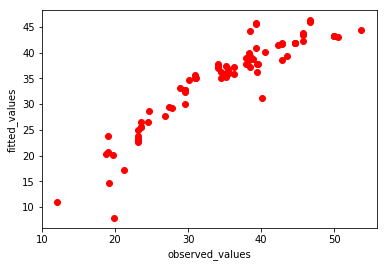

In [45]:
plt.scatter(cars_new.MPG,mpg_pred,c="r");plt.xlabel("observed_values");plt.ylabel("fitted_values")

Text(0, 0.5, 'residuals')

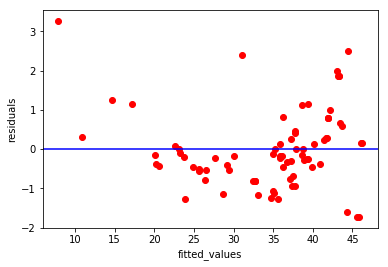

In [46]:
plt.scatter(mpg_pred,final_ml.resid_pearson,c="r"),plt.axhline(y=0,color='blue');plt.xlabel("fitted_values");plt.ylabel("residuals")

(array([ 6., 12., 17., 21.,  7.,  9.,  0.,  4.,  2.,  1.]),
 array([-1.74010304, -1.23917793, -0.73825281, -0.2373277 ,  0.26359741,
         0.76452253,  1.26544764,  1.76637276,  2.26729787,  2.76822298,
         3.2691481 ]),
 <a list of 10 Patch objects>)

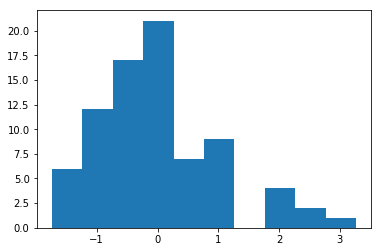

In [47]:
plt.hist(final_ml.resid_pearson) 

((array([-2.37663702, -2.02958204, -1.82767017, -1.68081377, -1.5632274 ,
         -1.46398099, -1.37736584, -1.30000518, -1.22972736, -1.16504879,
         -1.10490843, -1.04851956, -0.99528161, -0.94472489, -0.89647454,
         -0.8502261 , -0.80572849, -0.76277189, -0.72117887, -0.68079772,
         -0.64149747, -0.60316407, -0.5656973 , -0.52900844, -0.49301835,
         -0.45765594, -0.4228569 , -0.38856265, -0.35471952, -0.32127797,
         -0.288192  , -0.25541861, -0.22291736, -0.19064996, -0.15857989,
         -0.12667214, -0.09489286, -0.06320916, -0.0315888 ,  0.        ,
          0.0315888 ,  0.06320916,  0.09489286,  0.12667214,  0.15857989,
          0.19064996,  0.22291736,  0.25541861,  0.288192  ,  0.32127797,
          0.35471952,  0.38856265,  0.4228569 ,  0.45765594,  0.49301835,
          0.52900844,  0.5656973 ,  0.60316407,  0.64149747,  0.68079772,
          0.72117887,  0.76277189,  0.80572849,  0.8502261 ,  0.89647454,
          0.94472489,  0.99528161,  1.

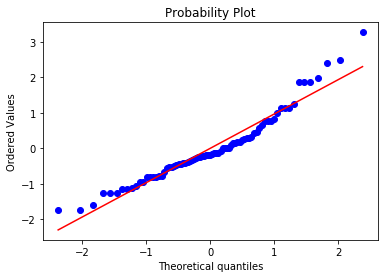

In [48]:
# QQ plot for residuals 
import pylab          
import scipy.stats as st

# Checking Residuals are normally distributed
st.probplot(final_ml.resid_pearson, dist="norm", plot=pylab)

Text(0, 0.5, 'residuals')

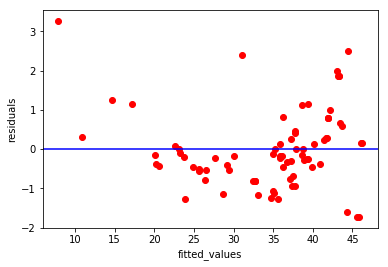

In [49]:
# Residuals VS Fitted Values 
plt.scatter(mpg_pred,final_ml.resid_pearson,c="r"),plt.axhline(y=0,color='blue');plt.xlabel("fitted_values");plt.ylabel("residuals")

In [52]:
from sklearn.model_selection import train_test_split
cars_train,cars_test  = train_test_split(cars_new,test_size = 0.2)
cars_train
cars_test

,HP,MPG,VOL,SP,WT
75,175,18.762837,129,132.864163,42.778219
14,66,45.734893,89,108.185353,29.347279
36,90,37.958743,88,114.093382,28.754000
26,92,38.411003,117,120.760520,38.062823
23,81,40.474723,96,113.829145,31.837122
37,102,34.070668,86,116.909442,27.879915
34,81,39.531633,101,111.288996,32.701644
18,78,42.789909,91,114.369293,29.929394
27,92,38.411003,99,119.105055,32.835069
60,145,27.354265,111,130.208698,36.888153


In [53]:
model_train = smf.ols("MPG~HP+SP+VOL",data=cars_train).fit()

In [54]:
train_pred = model_train.predict(cars_train)

In [55]:
train_resid  = train_pred - cars_train.MPG

In [56]:

train_resid

0     -9.471971
2     -7.089322
15    -3.113908
43     2.489099
47     0.827849
13    -3.113908
48     4.600792
71     0.253450
5     -2.533545
66     2.147580
72     0.549732
64     2.355465
24     1.471814
61     4.647687
49     3.217549
11     5.903840
63     3.330606
55     1.766415
67     0.863693
39     4.008228
33    -0.572214
77    -3.701564
57     3.217549
45     1.676186
12     1.064571
42     2.820805
20     0.664050
3     -2.829826
65    -8.478571
32     1.007955
        ...    
25     5.503318
54     1.054363
28    -4.137467
21    -4.205688
50     3.217549
58     4.808082
29     1.106781
17     5.903840
44     0.653156
69    -3.597060
9     -1.161395
79   -10.952738
73     2.314558
52     0.946056
1     -7.089322
8     -0.895583
30    -3.031060
80     0.191844
16    -1.318408
31    -1.747172
41     0.711409
7     -0.895583
22     0.286687
6     -7.089322
35    -0.091006
40     0.020085
38     3.413368
10    -3.113908
51     3.217549
46     0.491059
Length: 63, dtype: float

In [58]:
train_rmse = np.sqrt(np.mean(train_resid*train_resid))
train_rmse


3.716875924930358

In [60]:
test_pred = model_train.predict(cars_test)
test_pred

75    20.894439
14    41.894237
36    38.855343
26    37.297362
23    39.801717
37    37.484037
34    37.964302
18    41.471501
27    39.075053
60    29.505358
74    24.462477
62    26.056439
4     42.961615
70    20.679638
19    38.717546
59    33.313903
dtype: float64

In [61]:
# test residual values 
test_resid  = test_pred - cars_test.MPG

In [62]:
test_resid

75    2.131603
14   -3.840656
36    0.896600
26   -1.113641
23   -0.673006
37    3.413368
34   -1.567331
18   -1.318408
27    0.664050
60    2.151093
74    5.376136
62    2.540522
4    -7.542617
70    1.001131
19   -0.184287
59    4.453678
dtype: float64

In [64]:
test_rmse = np.sqrt(np.mean(test_resid*test_resid))
test_rmse

3.120746986703389

In [83]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Break into left and right hand side; y and X
y, X = dmatrices("MPG ~ WT + VOL + SP+HP ", data=cars, return_type="dataframe")

# For each Xi, calculate VIF
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

[892.9091727452061,
 639.5338175572624,
 638.8060836592878,
 20.00763878305008,
 19.926588974998563]